In [1]:
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import csv
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [14]:
data = load_digits()

<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.ndarray'> (64,) 16.0 0.0


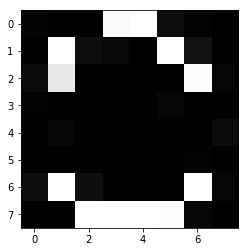

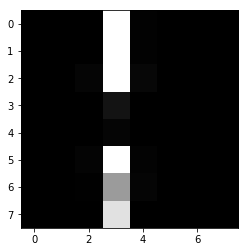

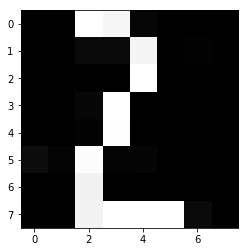

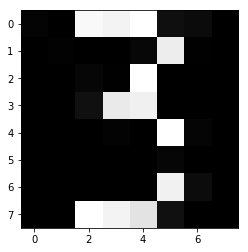

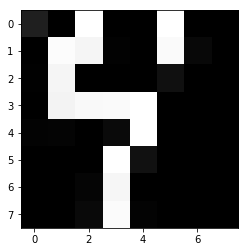

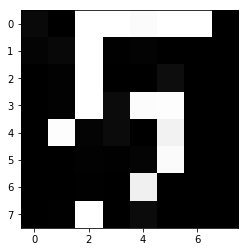

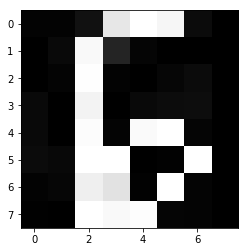

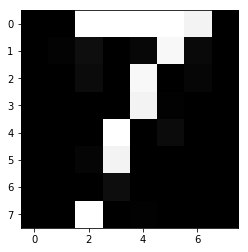

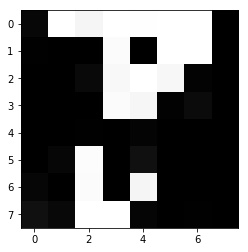

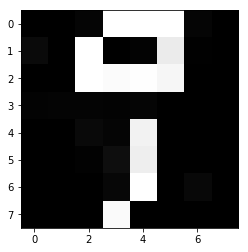

In [15]:
import cv2
import numpy as np
from PIL import Image as PIL_Image

img_path = 'digits_processed/'
img_names = ['digit-0a.jpg', 'digit-1a.jpg', 'digit-2a.jpg', 'digit-3a.jpg', 'digit-4a.jpg',
             'digit-5a.jpg', 'digit-6a.jpg', 'digit-7a.jpg', 'digit-8a.jpg', 'digit-9a.jpg']

def digit_import(img_name):
    img = PIL_Image.open(img_path + img_name).convert("L")  
    image = img.resize((8,8))  
    image = np.asarray(image)*16.0/255.0 
    image = image.flatten()
    print(type(image), image.shape, image.max(), image.min())
    plt.figure()
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    return image
    
for i,img in zip(range(10), img_names):
    data.data[i] = digit_import(img)
    print(type(data.data[i]), data.data[i].shape, data.data[i].max(), data.data[i].min())
    data.target[i] = i

In [7]:
print(data.data.shape)

(1797, 64)


<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 0
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 1
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 2
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 3
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 4
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 5
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 6
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 7
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 8
<class 'numpy.ndarray'> (64,) 16.0 0.0
<class 'numpy.int64'> 9


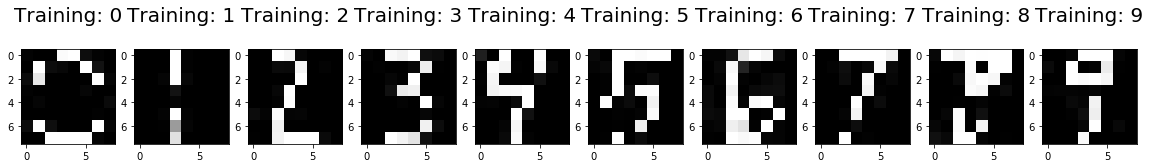

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data.data[0:10], data.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    print(type(image), image.shape, image.max(), image.min())
    print(type(label), label)
    plt.title('Training: %i\n' % label, fontsize = 20)

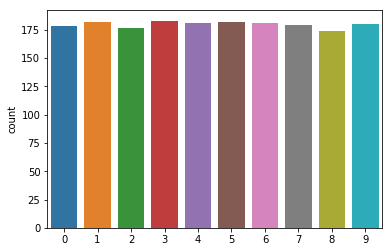

In [160]:
sns.countplot(data['target'])
plt.show()

In [10]:
trainX, testX, trainY, testY = train_test_split(data.data, data.target, test_size=0.25, random_state=0)

In [11]:
def accuracy_precision_recall_fscore(expected, predicted):
    print("Accuracy: ", accuracy_score(expected, predicted))
    print("precision_recall_fscore with macro average:", precision_recall_fscore_support(expected, predicted, average='macro'))
    print("precision_recall_fscore with micro average:", precision_recall_fscore_support(expected, predicted, average='micro'))
    print("precision_recall_fscore with macro weighted:", precision_recall_fscore_support(expected, predicted, average='weighted'))

In [12]:
clf = LogisticRegression()
clf.fit(trainX, trainY)
expected = testY
predicted = clf.predict(testX)
accuracy_precision_recall_fscore(expected, predicted)

Accuracy:  0.9533333333333334
precision_recall_fscore with macro average: (0.9546987309543701, 0.9537033187680339, 0.953616938741184, None)
precision_recall_fscore with micro average: (0.9533333333333334, 0.9533333333333334, 0.9533333333333334, None)
precision_recall_fscore with macro weighted: (0.9545686402956245, 0.9533333333333334, 0.9533467466679719, None)


/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [164]:
clf = GaussianNB()
clf.fit(trainX, trainY)
expected = testY
predicted = clf.predict(testX)
accuracy_precision_recall_fscore(expected, predicted)

Accuracy:  0.8333333333333334
precision_recall_fscore with macro average: (0.8704052578328934, 0.8329712108858702, 0.8332741681010101, None)
precision_recall_fscore with micro average: (0.8333333333333334, 0.8333333333333334, 0.8333333333333334, None)
precision_recall_fscore with macro weighted: (0.8680434577712337, 0.8333333333333334, 0.8321705331773523, None)


In [165]:
clf = KNeighborsClassifier()
clf.fit(trainX, trainY)
expected = testY
predicted = clf.predict(testX)
accuracy_precision_recall_fscore(expected, predicted)

Accuracy:  0.98
precision_recall_fscore with macro average: (0.9813230147753556, 0.9802257861434207, 0.9804562804949924, None)
precision_recall_fscore with micro average: (0.98, 0.98, 0.98, None)
precision_recall_fscore with macro weighted: (0.9804995347423058, 0.98, 0.9799177840025449, None)


In [166]:
clf = LinearSVC()
clf.fit(trainX, trainY)
expected = testY
predicted = clf.predict(testX)
accuracy_precision_recall_fscore(expected, predicted)

Accuracy:  0.9333333333333333
precision_recall_fscore with macro average: (0.936374935480262, 0.9341114022865827, 0.9344720584935162, None)
precision_recall_fscore with micro average: (0.9333333333333333, 0.9333333333333333, 0.9333333333333333, None)
precision_recall_fscore with macro weighted: (0.9355552251108041, 0.9333333333333333, 0.933677050964036, None)


/Users/nirali/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [167]:
trainXStd= StandardScaler().fit_transform(trainX)
testXStd= StandardScaler().fit_transform(testX)

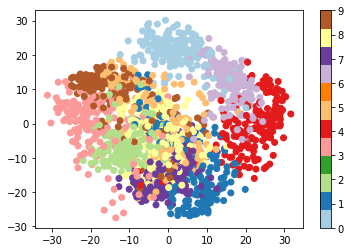

In [168]:
pca2 = PCA(n_components=2)
proj = pca2.fit_transform(data.data)
plt.scatter(proj[:, 0], proj[:, 1], c=data.target, cmap="Paired")
plt.colorbar()

In [169]:
pcaClf2 = PCA(n_components=2, whiten=True)
pcaClf2.fit(trainXStd)
trainXPCA = pcaClf2.transform(trainXStd)
clf = SVC()
clf.fit(trainXPCA,trainY)
expected = testY
testXPCA = pcaClf2.transform(testXStd)
predicted = clf.predict(testXPCA)
accuracy_precision_recall_fscore(expected, predicted)

Accuracy:  0.5133333333333333
precision_recall_fscore with macro average: (0.5229729453020092, 0.5239804505254126, 0.5097653406219511, None)
precision_recall_fscore with micro average: (0.5133333333333333, 0.5133333333333333, 0.5133333333333333, None)
precision_recall_fscore with macro weighted: (0.5183960269861976, 0.5133333333333333, 0.50185100174445, None)


/Users/nirali/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


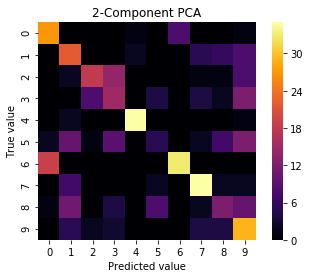

In [170]:
cm2 = confusion_matrix(expected,predicted)
sns.heatmap(cm2, square=True, cmap='inferno')
plt.title('2-Component PCA')
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [171]:
pcaClf5 = PCA(n_components=5, whiten=True)
pcaClf5.fit(trainXStd)
trainXPCA = pcaClf5.transform(trainXStd)
clf = SVC()
clf.fit(trainXPCA,trainY)
expected = testY
testXPCA = pcaClf5.transform(testXStd)
predicted = clf.predict(testXPCA)
accuracy_precision_recall_fscore(expected, predicted)

Accuracy:  0.86
precision_recall_fscore with macro average: (0.8676184234943684, 0.8636134002878579, 0.8642376167206818, None)
precision_recall_fscore with micro average: (0.86, 0.86, 0.8599999999999999, None)
precision_recall_fscore with macro weighted: (0.8629529750360351, 0.86, 0.860084009632959, None)


/Users/nirali/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


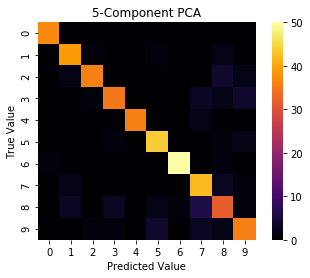

In [172]:
cm5 = confusion_matrix(expected,predicted)
sns.heatmap(cm5, square=True, cmap='inferno')
plt.title('5-Component PCA')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [173]:
pcaClf7 = PCA(n_components=7, whiten=True)
pcaClf7.fit(trainXStd)
trainXPCA = pcaClf7.transform(trainXStd)
clf = SVC()
clf.fit(trainXPCA,trainY)
expected = testY
testXPCA = pcaClf7.transform(testXStd)
predicted = clf.predict(testXPCA)
accuracy_precision_recall_fscore(expected, predicted)

Accuracy:  0.9177777777777778
precision_recall_fscore with macro average: (0.9237753838377456, 0.9194798392944504, 0.9205121029705481, None)
precision_recall_fscore with micro average: (0.9177777777777778, 0.9177777777777778, 0.9177777777777778, None)
precision_recall_fscore with macro weighted: (0.9210999805770262, 0.9177777777777778, 0.9183231016020308, None)


/Users/nirali/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


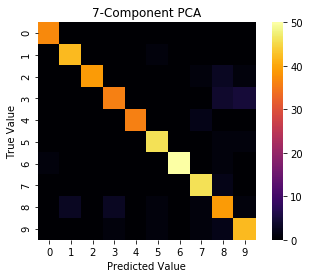

In [174]:
cm7 = confusion_matrix(expected,predicted)
sns.heatmap(cm7, square=True, cmap='inferno')
plt.title('7-Component PCA')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

# plot SVC model
try different SCM classifiers too.
https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

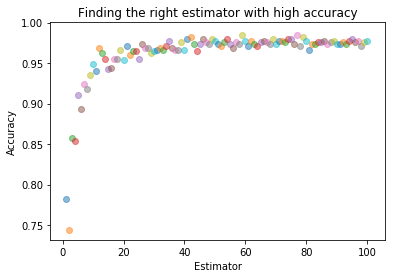

max_acc: 0.9844444444444445
max_estimator: 59


In [175]:
max_acc=0
max_estimator=0
for i in range(1,101):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(trainX, trainY)
    expected = testY
    predicted = clf.predict(testX)
    acc=accuracy_score(expected, predicted)
    if(max_acc<acc):
        max_acc=acc
        max_estimator=i
    estimator= i
    plt.scatter(estimator, acc, alpha=0.5)
    
plt.title('Finding the right estimator with high accuracy')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.show()

print("max_acc: "+ str(max_acc))
print("max_estimator: "+str(max_estimator))